# Unit 3 Assessment - Empirical Models

## Instructions

In this assessment, you are going to develop an emperical model by fitting a curve to data, and you will use your model to make predictions.

Scores are determined by:

- Successfully starting the C Level = 50 pts
- Perfectly completing the C Level = 75 pts
- Perfectly completing the B and C Levels = 85 pts
- Perfectly completing the A, B, and C Levels = 100 pts

You may use your Colab notebooks, our textbook, my notebook solutions, and any links to web sites I provide. (You may not use any other person or web site or book or resource, in general.) 

You may ask me for help **once**; however, you may ask for clarification as often as needed.

Add additional cells for both code and markdown as needed. **Write answers to questions in narrative form in markdown.** You may print values you need in your code, and then use these values in a written response.

All graphs should have correct titles and axis labels (with units).

## Grade

<font color="green"></font>

Level | Grade | Comment
--- | --- | ---
C (75 pts) | | 
B (10 pts) | | 
A (15 pts) | | 
Total | 


# Level C

## Exercise 0

1. Save a copy of this notebook to Google Drive. Have you already shared your Google Colabortory folder with "hpuphysicsdepartment@gmail.com"? If not, then be sure to share your folder.

2. Add a text cell above and type your name as a level one heading in markdown. (A level one heading starts with # on its own line.)

3. Run the `import` statements below to add packages.

In [25]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe
from scipy.optimize import curve_fit #used to find the fit parameters

## Exercise 1

As the tempature of a solution increases, the amount of solute that can be disolved increases. This [data set](https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/solubility.txt) ([source](https://pubs-acs-org.proxy1.cl.msu.edu/doi/abs/10.1021/je00045a020)) shows the amount of sodium chloride (measured in g) that can be disolved in 100 g of a particular water-based solvent. Read the data and graph the amount of sodium chloride that can be disolved as a function of temperature.

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/solubility.txt", sep="\t")
df.head()

,Temp (C),NaCl Solubility (g)
0,27.0,26.76
1,30.0,26.79
2,40.0,27.28
3,40.0,27.86
4,50.0,26.89


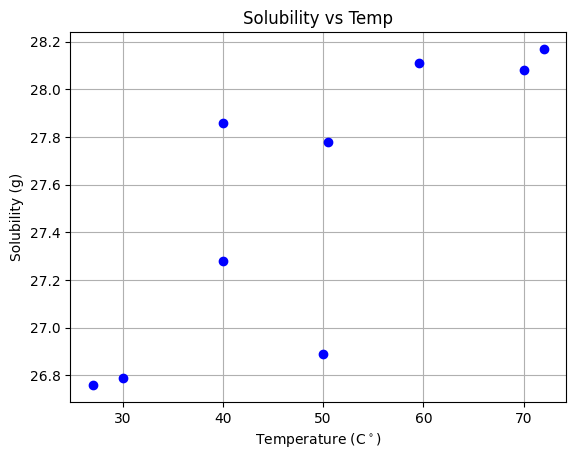

In [27]:
xdata = df['Temp (C)']
ydata = df['NaCl Solubility (g)']

plt.figure()
plt.title('Solubility vs Temp')
plt.xlabel('Temperature (C$^\circ$)')
plt.ylabel('Solubility (g)')
plt.plot(xdata, ydata, 'bo')
plt.grid()
plt.show()

## Exercise 2

For the data in Exercise 1, do a linear curve fit and print the best-fit parameters for solubility as a function of temperature. Plot the best-fit curve and the data on the same graph.

[ 0.02983566 26.06879549]


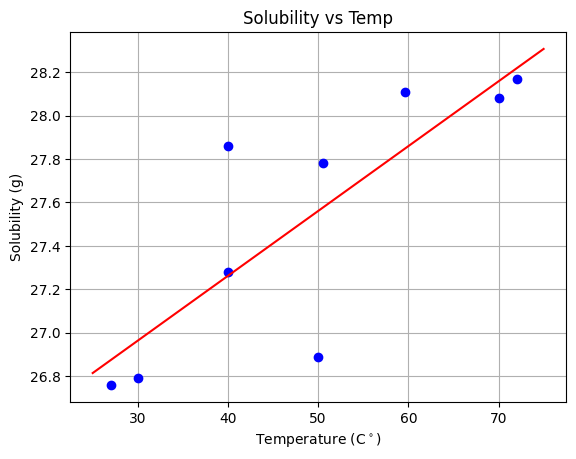

In [28]:
model = lambda x,m,b: x*m+b

params,cov = curve_fit(model,xdata,ydata)

print(params)

xmodel = np.linspace(25,75,100)
ymodel = model(xmodel, *params)

plt.figure()
plt.title('Solubility vs Temp')
plt.xlabel('Temperature (C$^\circ$)')
plt.ylabel('Solubility (g)')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel,ymodel,"r-")
plt.grid()
plt.show()

## Exercise 3

Using your curve-fit, predict the amount of NaCl that can be disolved at 80 $\text{C}^\circ$, and predict predict the amount of NaCl that can be disolved at 45 $\text{C}^\circ$.

In [29]:
print("At 45 degrees celsius, the predicted amount of NaCl that can be dissolved is ", model(45,*params), "g")

print("At 80 degrees celsius, the predicted amount of NaCl that can be dissolved is ", model(80,*params), "g")

At 45 degrees celsius, the predicted amount of NaCl that can be dissolved is  27.41140041469333 g
At 80 degrees celsius, the predicted amount of NaCl that can be dissolved is  28.4556486879495 g


## Exercise 4

Using your curve-fit, predict the amount of NaCl that can be disolved at 100 $\text{C}^\circ$, and predict predict the amount of NaCl that can be disolved at 0 $\text{C}^\circ$.

In [30]:
print("At 0 degrees celsius, the predicted amount of NaCl that can be dissolved is ", model(45,*params), "g")

print("At 100 degrees celsius, the predicted amount of NaCl that can be dissolved is ", model(80,*params), "g")

At 0 degrees celsius, the predicted amount of NaCl that can be dissolved is  27.41140041469333 g
At 100 degrees celsius, the predicted amount of NaCl that can be dissolved is  28.4556486879495 g


## Exercise 5

What predictions from the last two exercises do you believe are valid? Why do you believe those predictions are valid but the other predictions are not? What additional data or modification to the model would you need to make to predict the solubility at each of the temperatures in the above exercises?

The predictions at 45 and 80 $\text{C}^\circ$ are liekly valid since they lie within the region for which we have data. The predictions at 0 and 100 $\text{C}^\circ$ are quite suspect. Since the solute is water based, its freezing point will be around 0 $\text{C}^\circ$ and its boiling point around 100 $\text{C}^\circ$ where solubality (i.e. how much of something is disolved in a liquid) becomes an ill-defined concept..

# Level B

As the name "Normal" distribution implies, Gaussian distributions crop up all over the place in data analysis. This is due in large part to the Central Limit Theorem. In the Unit 2 assesment (level B), we modeled a fundraiser for a club. We were asking where a ball dropped down a Galton Board would land. When we plotted the distribution of the final x-position of the balls dropped we found a Gaussian distribution. 

[This file](https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/fundraiser_sim.txt) contains the data from running our Monte-Carlo simulation dropping 100,000 balls.

## Exercise 1
Read the data and plot the number of balls as a function of x-position.

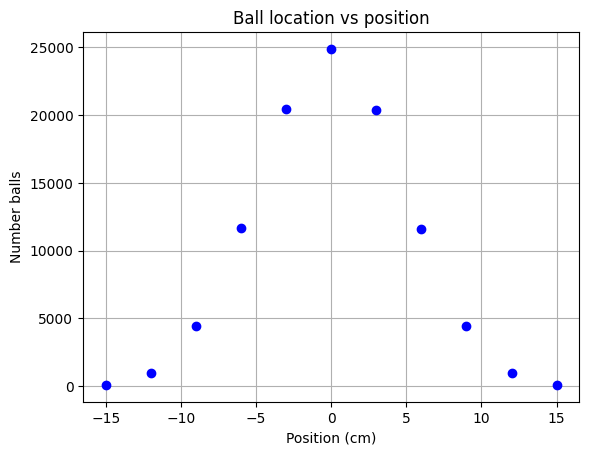

In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/fundraiser_sim.txt", sep="\t")

xdata = df['x-position (cm)']
ydata = df['N Balls']

plt.figure()
plt.title('Ball location vs position')
plt.xlabel('Position (cm)')
plt.ylabel('Number balls')
plt.plot(xdata, ydata, 'bo')
plt.grid()
plt.show()

## Exercise 2
Fit a Gaussian curve to the number of balls as a function of x-position:
$$y=A e^{\left(-\frac{1}{2}\left(\frac{x-B}{C}\right)^2\right)}$$
where $y$ is the number of balls and $x$ is the x-position. Print the best-fit parameters (A,B,C) and plot the best-fit curve on the same graph as the data.


[ 2.48452844e+04 -1.01474317e-02  4.84107100e+00]


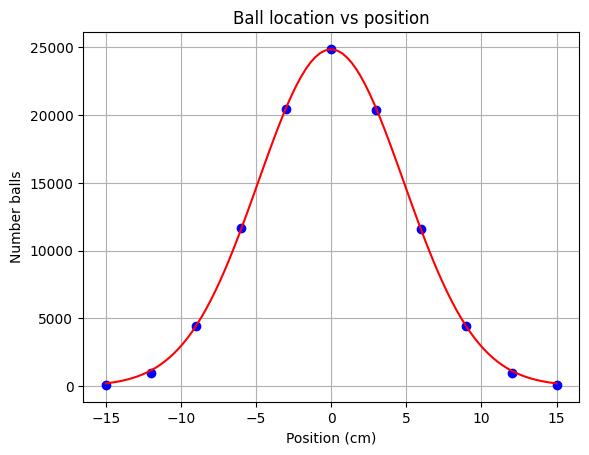

In [32]:
model = lambda x,a,b,c: a*np.exp(-0.5*((x-b)/c)**2)

guess = [1,1,1]
params,cov = curve_fit(model, xdata,ydata,p0=guess)
print(params)

xmodel = np.linspace(-15,15,100)
ymodel = model(xmodel, *params)

plt.figure()
plt.title('Ball location vs position')
plt.xlabel('Position (cm)')
plt.ylabel('Number balls')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'r-')
plt.grid()
plt.show()

The best fit parameters for $A$, $B$, and $C$ are $24845.3$, $-1.01\times 10^{-2}$, and $4.841$, respectivley.

## Exercise 3

In this model, the $A$ parameter is the only parameter that depends on the number of balls dropped. Every other parameter will remain the same as we change the number of balls dropped. We can break $A$ into two parts, $a$ and $N$:
$$ A = aN $$
where $N$ is the number of balls we are dropping and $a$ is the fraction of all balls dropped that land at x-position 0.

What is the value of $a$?

In [33]:
a = params[0]/100000
print(f"The value of a is {a:.3f}.")

The value of a is 0.248.


## Exercise 4
Suppose in the fundraiser we end up selling 1,000 ball drops. Using your answer from the previous exercise, what do we expect the value of $A$ to be? What do you expect the value of $B$ and $C$ to be? 

Note: In this exercise you should not be doing any fitting.

In [34]:
A = a*1000
print(f"The expected value of A is {A:.1f}")
print(f"The expected value of B is {params[1]:.2f}")
print(f"The expected value of C is {params[2]:.2f}")

The expected value of A is 248.5
The expected value of B is -0.01
The expected value of C is 4.84


## Exercise 5

[This file](https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/fundraiser_sim.txt) contains the results of running the monte-carlo simulation dropping 1000 balls. Using your answers for the expected model parameters in the previous exercise, plot the prediction of the model and the data on the same graph for a fundraiser where 1000 balls are dropped.

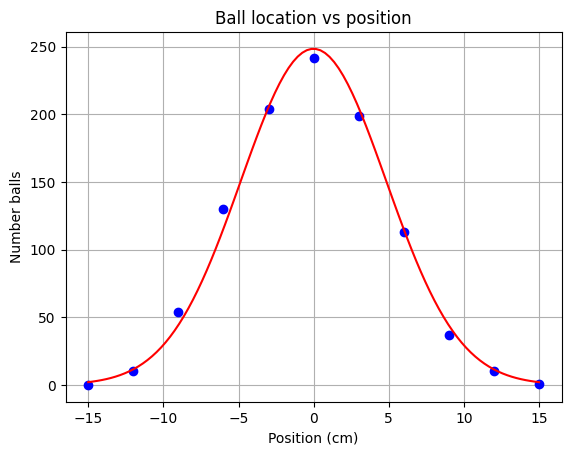

In [35]:
df = pd.read_csv("https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/fundraiser_sim_1000.txt", sep="\t")

xdata = df['x-position (cm)']
ydata = df['N Balls']

model = lambda x,a,b,c: a*np.exp(-0.5*((x-b)/c)**2)

xmodel = np.linspace(-15,15,100)
ymodel = model(xmodel, 248.5,-0.01,4.84)

plt.figure()
plt.title('Ball location vs position')
plt.xlabel('Position (cm)')
plt.ylabel('Number balls')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'r-')
plt.grid()
plt.show()

# Level A



In language, it is often the case that the most common word occurs about twice as often as the second most common word, about three times as often as the third most common word, etc. If we were to take every word in English and sort them by how frequently they occur, the *rank* of a word is its position in this ordered list. That is, the most common word has rank 1, the second most common has rank 2, etc. This [file](https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/english_words.txt) contains the 1500 most common words in English ranked by how frequently they occur. The data comes from scraping one million sentences off of websites with a ``.com`` domain ([source](https://wortschatz.uni-leipzig.de/en/download)).


## Exercise 1

Read the data into a `dataframe` and print the first few rows in the file using the `head()` function. Do not try to copy and paste the data (there is too much of it). What is the most common word in English? What is the second most common word in English?


In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/english_words.txt", sep="\t")
df.head()

,Rank,Word,Frequency
0,1,the,795170
1,2,to,504706
2,3,and,479484
3,4,a,416154
4,5,of,411095


## Exercise 2
Plot the frequency of words in English as a function of their rank.

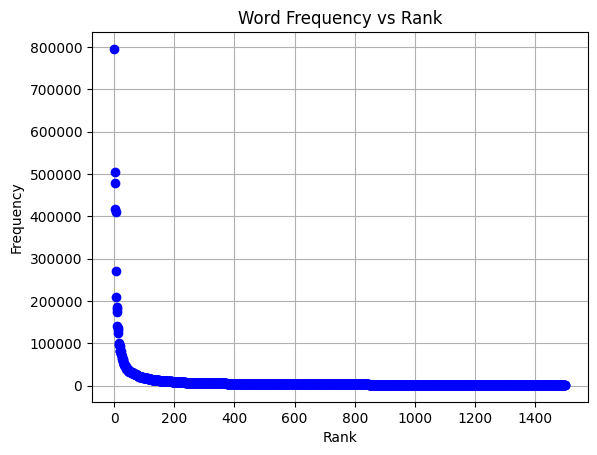

In [37]:
xdata = df['Rank']
ydata = df['Frequency']

plt.figure()
plt.title('Word Frequency vs Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.plot(xdata, ydata, 'bo')
#plt.xlim(0,5000)
#plt.ylim(0,50000)
plt.grid()
plt.show()

## Exercise 3

Fit a curve to the frequency of words as a function of their rank using the following power law:

$$ y = \frac{A}{(x+B)^n}$$
where $y$ is the frequency of a word and $x$ is the rank of the word. Print the values of the best-fit parameters ($A$, $B$, and $n$). A power law distribution of this form is known as a [Zipf-Mandelbrot law](https://en.wikipedia.org/wiki/Zipf%E2%80%93Mandelbrot_law). Print the best-fit parameters and plot the best-fit curve on the same graph as the data.


[2.62345925e+06 2.02392010e+00 1.09070333e+00]


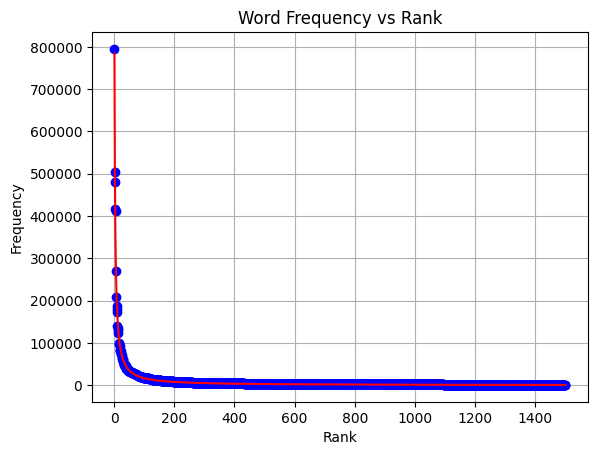

In [38]:
xdata = df['Rank']
ydata = df['Frequency']

model = lambda x,a,b,c: a/((x+b)**c)

params, cov = curve_fit(model, xdata, ydata, p0=[80000,1,1])

xmodel = np.linspace(1,1500,1000)
ymodel = model(xmodel, *params)

print(params)

plt.figure()
plt.title('Word Frequency vs Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'r-')
#plt.xlim(0,5000)
#plt.ylim(0,50000)
plt.grid()
plt.show()

The best fit parameters for $A$, $B$, and $n$ are $2.62\times10^6$, $2.024$, and $1.09$, respectivley.

## Exercise 5
With the large spread of values on the y-axis, it is hard to see how well the model and data are agreeing at higher ranks. Fill in the following table with the prediction of your model for the frequency of words. You can use your graph or you can calculate your prediction with your model. **As the rank of the word increases how does the accuracy of our model change?**


If you want to graph data within a certain range, you can use:

```
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
```

where `xmin`, `xmax`, `ymin`, and `ymax` are the minimum and maximum values on the x and y axes, respectively.

Note: The **percent difference** is the difference between the actual and predicted quantity divided by the actual quantity, expressed as a precentage.

|Word|Rank|Frequency|Predicted Frequency|% Difference|
|---|---|---|---|---|
|I|10|172807|174126|0.76
|love|147|12071|11181 |-7.37%
|every|166|10852|9810 |-9.60%
|dog|1335|1572|1021|-35.03%



In [39]:
R = 147
F = 12071
f = model(R,*params)

diff = (f-F)/F*100
print(f"At rank {R} the predicted frequency is {f:.0f} and the actual frequency is {F:.0f} ({diff:.2f}% diff).")

At rank 147 the predicted frequency is 11181 and the actual frequency is 12071 (-7.37% diff).


## Exercise 6

Fit a curve to the frequency of words as a function of their rank using the Zipf-Mandelbrot law from Exercise 3 for words with a rank greater than 10. Plot the best-fit curve with the new fit parameters on the same graph as the data.

Recall from the COVID exercise in a previous notebook how we can take a sub-range of data: 

```
xdata2 = xdata[5:15]
ydata2 = ydata[5:15]
```

Each list *includes* index 5 and *excludes* index 15. Thus, the data includes index 5 through index 14. If we want all data after and including index 5 we can write `xdata2 = xdata[5:]`

[1.59518947e+06 7.37535923e-01 9.74480430e-01]


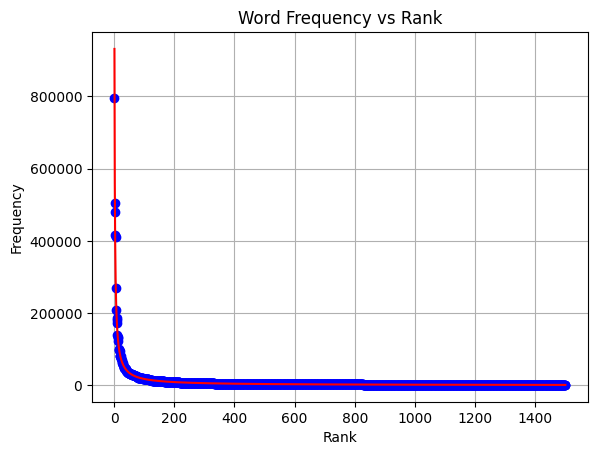

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/anthoak13/HNR-1303-F23/main/unit-03/03-10-problem/english_words.txt", sep="\t")


xdata = df['Rank']
ydata = df['Frequency']

params, cov = curve_fit(model, xdata[10:], ydata[10:], p0=[80000,1,1])

xmodel = np.linspace(1,1500,5000)
ymodel = model(xmodel, *params)

print(params)

plt.figure()
plt.title('Word Frequency vs Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'r-')
#plt.xlim(0,5000)
#plt.ylim(0,10000)
plt.grid()
plt.show()

The best fit parameters for $A$, $B$, and $n$ are $1.595\times10^6$, $0.736$, and $0.974$, respectivley.

## Exercise 7
Fill in the following table with the prediction of your model from Exercise 6. You can use your graph or you can calculate your prediction with your model. **As the rank of the word increases how does the accuracy of our model change? Around what rank does our new model start underpredicting the frequency of words?**


|Word|Rank|Frequency|Predicted Frequency|% Difference|
|---|---|---|---|---|
|I|10|172807|157840 |-8.66%
|love|147|12071|12266  |1.61%
|every|166|10852|10901  |0.46%
|dog|1335|1572|1021|-8.71%


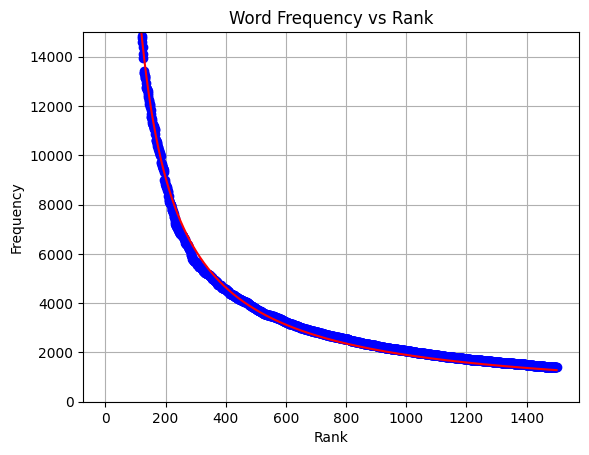

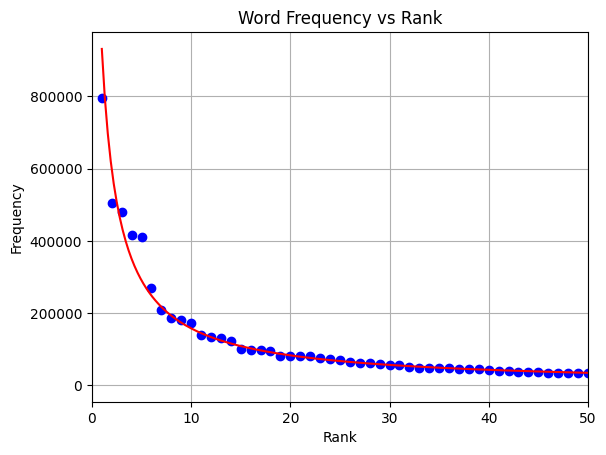

In [41]:
plt.figure()
plt.title('Word Frequency vs Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'r-')
#plt.xlim(0,5000)
plt.ylim(0,15000)
plt.grid()
plt.show()
plt.figure()
plt.title('Word Frequency vs Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.plot(xdata, ydata, 'bo')
plt.plot(xmodel, ymodel, 'r-')
plt.xlim(0,50)
#plt.ylim(0,100000)
plt.grid()
plt.show()